<h1>PROJECT 1</h1>

<h3> By: Mathias Elstroem, Pawel Zelazkowski, Nahom Tesema </h3>

<h3>Abstract<h3>
<h4>This project focused on how the precision of numbers affects computations and how errors in scientific calculations can impact real world outcomes, as well as the restrictions of computer memory. The built in limits of floating point arithmetic mean. As well as why we need to handle numerical errors like rounding off and truncation with great care to make sure our results are precise. Later in the project we go into teaching the machine calculus to have it calculate the difference of multiple functions. </h4>

<h3>Introduction</h3>
<h5>This project looks at key aspects of numerical methods and their Python implementations, starting with the floating-point arithmetic. We will look at why expressions like 0.1 + 0.2 don’t quite equal 0.3 but 0.125 + 0.25 does equal 0.375, due to the way computers represent floating-point numbers and handle rounding off and truncation errors. We also implement numerical differentiation techniques, comparing forward and central difference methods for calculating derivatives, and be able to implement them for practical use.</h4>

<h5>Additionally, we compare lists with NumPy arrays, showing how NumPy's array operations can improve efficency. We use the Matplotlib module to create plots that illustrate truncation and rounding errors visually. Finally, we discuss on automatic differentiation, which provides precise derivative calculations by automating gradient computations. Lastly, we summarize our conclusions and share our reflections on the knowledge gained from working on the project.
</h4>

<h2>Exercise 1: Finite-precision arithmetic</h2>
<h3>Part 1</h3>
<h5>Implementing given code to import sys module and floating point information:</h5>

In [2]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


<h4> The command "sys.float_info" prints out following data  [2] [3]: </h4>

    - max: the highest positive floating point (1.798e+308) that can be represented as a number in Python.
    - max_exp: the highest integer i (1024) such that i-1 in e**i results in a representative (within exisitng range) floating-point in Python.
    - max_10_exp: the highest integer i (308) such that 10**i results in a representative floating-point in Python.
    - min: the smallest (positive) floating point (2.225e-308) that can be represented as a number in Python.
    - min_exp: the highest negative integer i (-1021) such that i-1 in e**i results in a within-exisitng-range floating-point in Python.
    - min_10_exp: the highest negative integer i (-307) such that 10**i results in a representative floating-point in Python.
    - dig: the highest number of significant figures that a float can have in order to stay uninfluenced when formated back and forth.
    - mant_dig: float precision, number of bits (53) used for the mantissa/significand in the binary representation of a floating point. 
    - epsilon: The smallest value (2.220e-16) greater than 1 that can be added to 1 in order to generate a new floating point. 
    - radix: provides the base of the floating-point representation. Number 2 indicates they are stored in the most common, binary system. 
    - rounds: Rounding modes for floating points arithmetics in Python. "1" stands for Pythons' standard rounding mode. Mode "1" rounds floats to the nearest value, where ties are being rounded to the nearest even number. 


Part 2

A floating point is represented in the following way [4]:

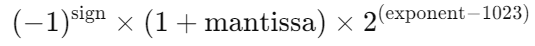

First bit stays 0 for the positive and switches to 1 for the negative sign.

    Manual calculation of the value sys.float_info.max (1.7976931348623157e+308).

Both exponent and mantissa must be set to maximum. Sign stays 0, positive. Exponent consists of 11 bits, therefore: "11111111110" which equals 2046. 2046 - 1023 = 1023. It is the largest exponent value possible, because "11111111111" is reserved for infinity. The largest mantissa we can get is 0.111...(52 ones), which results in 0.99999..., approximately 1. Mantissa starts with "0." because it represents the fractional part of a number. 

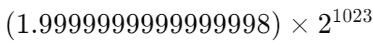

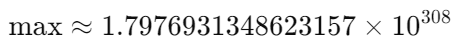

    Manual calculation of the value sys.float_info.min (2.2250738585072014e-308).


Mantissa stays zero to represent the smallest possible number "0". The smallest exponent possible is "00000000001" which results in 1. 1 - 1023 = -1022 The formula simplifies to:

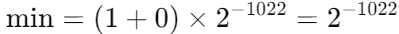

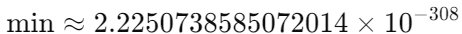

    Manual calculation of the value sys.float_info.min (2.220446049250313e-16):

1.000...000(52 zeros) = 1.

1.000...001(52 digits) = 2^-52 = 

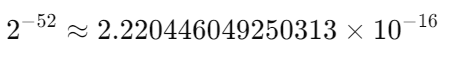

Part 3

0.1 + 0.2 won't produce an exact 0.3 output, because both these numbers cannot be represented exactly. Instead, they are approximated:

    0.1 = 0.000110011001100110011001100110011001100110011001100110011001100 = 0.09999999999999999991

    0.2 = 0.0011001100110011001100110011001100110011001100110011001100110011 = 0.19999999999999999999

0.25 + 0.125 will produce an exact 0.375 output, because both these numbers are represented exactly:

    0.25 = 0.01

    0.125 = 0.001

When added together they reproduce an exact number 0.375.

Part 4

In [3]:
i = 0.1 + 0.2
j = 0.3

if i == j:
    print("Given floats are equal.")
else: 
    print("Given floats are not equal.")

Given floats are not equal.


Comparing floating points this way isn't reliable, because certain floats in binary system (like 0.1 and 0.2) lack exact binary representation. However, their addition, for example 0.1 + 0.2 = 0.300...04, lays so close to the real value that their similarity can be aproximated:

In [9]:
def almost(i, j):
    return np.abs(i-j) < 0.0000000001

i = eval(input("First float?: "))
j = eval(input("Second float?: "))

if almost(i, j):
    print("Given floats are equal.")
else:
    print("Given floats are not equal.")

Given floats are not equal.


EXERCISE 2

Part 1

In [4]:
import numpy as np
x = np.linspace(0,9,10)
y = [0,1,2,3,4,5,6,7,8,9]
print(np.exp(x))

print(np.exp(y))

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


np.exp() function can be applied both to arrays, such as x, and lists, such as y. The problem occours when we command np.exp() function to automatically change the sign of a list; np.exp(-list). The function cannot change each item of a list automatically, their sign must be changed manually. np.exp() can, however, automatically change signs of every item in an array. This is a good representation of numpys' superior effectivity. 

Normally, I would evaluate a function on all elements/items of a list for example as follows:

In [14]:
for i in y:
    print(np.exp(-i))

1.0
0.36787944117144233
0.1353352832366127
0.049787068367863944
0.01831563888873418
0.006737946999085467
0.0024787521766663585
0.0009118819655545162
0.00033546262790251185
0.00012340980408667956


Part 2

Functions:

    - np.zero(i): creates an array of i zeros.
    - np.ones(i): creates an array of i ones.
    - np.linspace(a, b, c): creates an array of c elements evenly distributed between a and b, including a and b.
    - np.linspace(a, b, c, endpoint = false): first divides np.linspace(a, b, c) in c+1 elements between a and b. Then excludes the last element.
    - vector = np.arange(5) + 1: creates a five elements long array called "vector" [1, 2, 3, 4, 5]. 
    - 2*vector: multiplies each element of "vector" by 2. 

Producing the same output using native Python lists:

In [16]:
"np.zero(20):"
x = []
for i in range(0,20):
    x.append(0)
print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
"np.ones(20):"
x = []
for i in range(0,20):
    x.append(1)
print(x)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
"np.linspace(0,10,11)"
x = []
for i in range(0,11):
    x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [20]:
"Last lines"
vector = []
for i in range(0,5):
    vector.append((i+1)*2)
print(vector)

[2, 4, 6, 8, 10]


Part 3

In [23]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42, 0, 5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)

There are 7 non-zero numbers in the array.


The first line of code in the cell below crushes, because "and" operator doesn't evaluate validity ("truthiness") of every element in each array, is_even and is_greater_than_17. Rather, it treats both as single boolean values. This prevents Python from generating a new array where every element of array_of_numbers would be evaluated separately. To perform such logical, element-wise analysis, operator "&" is used. [14]

The second line fails, because both arrays on each side of "&" sign lack additional brackets. 

In [27]:
is_even_and_greater_than_17 = is_even and is_greater_than_17
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This is how such code could look like, in order to work. "and" is replaced by "&", and extra brackets are added.

In [25]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42, 0, 5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)

is_even_and_greater_than_17 = is_even & is_greater_than_17
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))

There are 7 non-zero numbers in the array.
[False False False False False  True False False]


In [26]:
# Using np.logical_and:

array_of_numbers = np.array([4, 8, 15, 16, 23, 42, 0, 5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)

is_even_and_greater_than_17 = np.logical_and(is_even, is_greater_than_17)
print(is_even_and_greater_than_17)

There are 7 non-zero numbers in the array.
[False False False False False  True False False]


Part 4

Function np.where() indicates which elements of an array fulfill given requirement, in this case x > 17, and where in the array it lays.

In [27]:
np.where(array_of_numbers > 17)[0]

array([4, 5], dtype=int64)

Function np.where(condition, 1, 0) returns an array where elements of the original array get changed into 1 if they fulfill, or into 0 if they don't fulfill the given condition.

In [28]:
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1, 0, 0])

EXERCISE 3 
Part 1

First, I defined the function $f(x)=\sin⁡(b \cdot x)⋅e^{−ax^2}$ in Python, using default values for the parameters aa and bb. I then created a function to plot f(x)f(x) over a specified interval. The function was visualized over the range [−10,10][−10,10] to observe its oscillatory behavior and amplitude modulation.

In [9]:
import matplotlib.pyplot as plt

def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

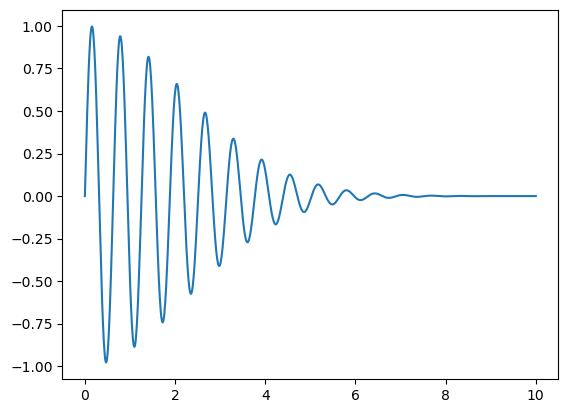

In [10]:
xpoints = np.linspace(0,10,1000)
ypoints = f(xpoints)
# Plot over an arbitrary chosen range 1-10.
plt.plot(xpoints,ypoints)
plt.show()

These plots illustrate the function’s behavior over the specified ranges of 0 to 10, showing it oscillaties before nulling out closer to the end.


Part 2: Analytical Derivative Calculation

The analytical derivative of the function f(x)f(x) is given by: $f(x) = \sin(bx) \cdot e^{2ax^2}-\cos(bx) \cdot e^{2ax^2}$ The Python function to compute this derivative is implemented as:

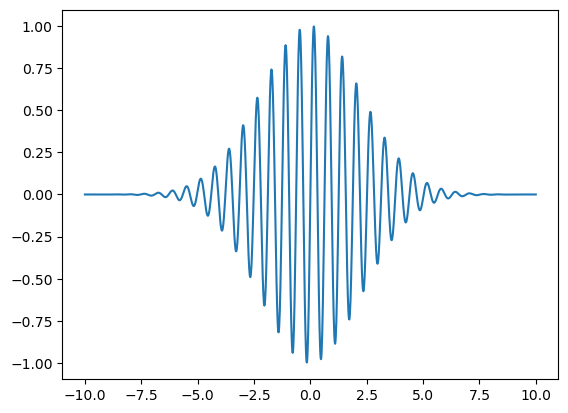

In [11]:
# Plot in the range [-10, 10]:
xpoints = np.linspace(-10,10,1500)
ypoints = f(xpoints)
plt.plot(xpoints,ypoints)
plt.show()

The plot displayed the behavior of the function over the chosen range of -10 to 10, showing how the decay of the sine wave, particularly in damping as x moves away from zero.

Part 2

The task is to derive the analytical expression for the derivative of f(x) using calculus, and doing such we get: $f′(x)=b \cdot \cos⁡(b \cdot x)⋅\exp^{−ax^2} −2ax\cdot \sin⁡(b \cdot x)⋅\exp^{−ax^2}$ This was then implemented in Python and plotted it over the same interval [−10,10][−10,10].

In [12]:
def fder(x,a,b):
    return b*np.cos(b*x)*np.exp(-a*x*x)-2*a*x*np.sin(b*x)*np.exp(-a*x*x)

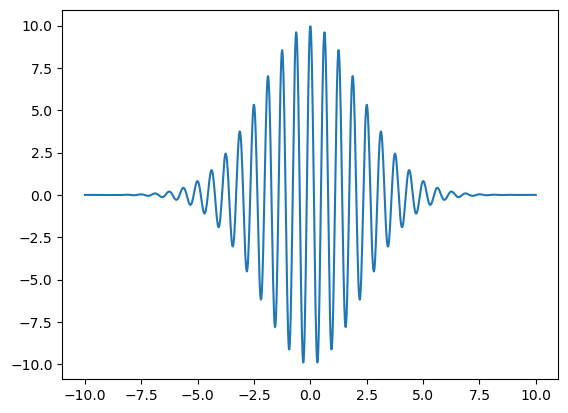

In [13]:
import matplotlib.pyplot as plt
xlist = np.linspace(-10,10,1000)
ylist = fder(xlist, 0.1, 10)
plt.plot(xlist,ylist)
plt.show()

Part 3

Python function that calculates the derivative of provided function using the forward difference method.

In [14]:
def forward_difference_derivative(f, x, h=0.0000001):
     return (f(x + h) - f(x)) / h

x_value = 1
derivative_at_x = forward_difference_derivative(f, x_value)

print(f"The derivative of f(x) at x = {x_value} using forward difference equals approximately {derivative_at_x}")

The derivative of f(x) at x = 1 using forward difference equals approximately -7.493780418421636


Part 4

Python function that calculates the derivative of provided function using the central difference method.

In [30]:
def central_difference_derivative(f, x, h=0.000001):
    return (f(x + h) - f(x - h)) / (2 * h)

x_value = 1
derivative_at_x = forward_difference_derivative(f, x_value)

print(f"The derivative of f(x) at x = {x_value} using forward difference equals approximately {derivative_at_x}")

The derivative of f(x) at x = 1 using forward difference equals approximately -7.493780418421636


Part 5

Scatter plots that show the absolute error of the forward and central differentiation approximation on the y-axis versus the step size h on the x-axis:

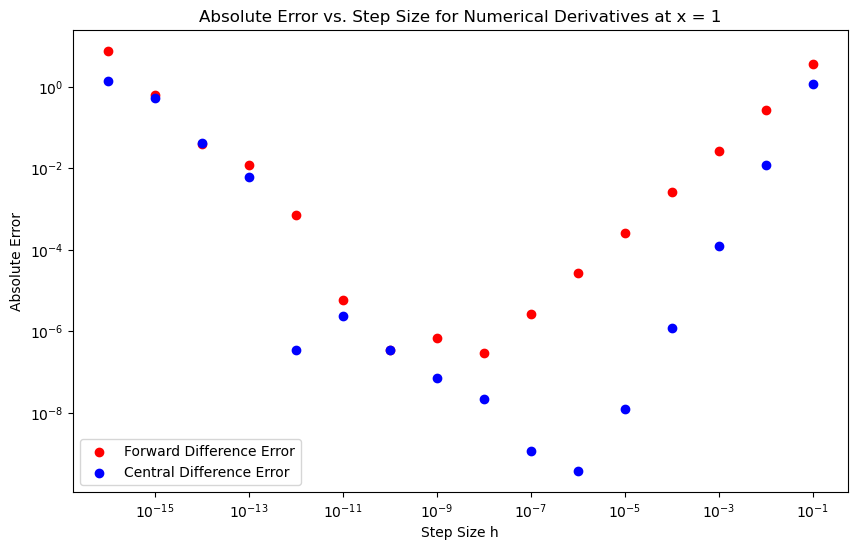

In [38]:
dx = np.logspace(-16,-1,16)
real_value = fder(1,0.1,10)

forward_errors = []
central_errors = []

x = 1
a = 0.1
b = 10

for h in dx:
    forward_approx = forward_difference_derivative(lambda x: f(x, a, b), x, h)
    central_approx = central_difference_derivative(lambda x: f(x, a, b), x, h)
    
    forward_errors.append(np.abs(forward_approx - real_value))
    central_errors.append(np.abs(central_approx - real_value))


plt.figure(figsize=(10, 6))
plt.scatter(dx, forward_errors, color='red', marker='o', label='Forward Difference Error')
plt.scatter(dx, central_errors, color='blue', marker='o', label='Central Difference Error')
plt.xscale("log")
plt.yscale('log')
plt.xlabel('Step Size h')
plt.ylabel('Absolute Error')
plt.title('Absolute Error vs. Step Size for Numerical Derivatives at x = 1')
plt.legend()
plt.show()

The figure above plots the absolute error between a result achieved through forward/central difference method and the real, analytical value of f'(x), with step size h-values on the x-axis and absolute error values on the y-axis. The central difference method (blue points) generates a lower absolute error throughout the h span than the forward difference method (red points) for most values of h. The plot shows that the smallest absolute error using forward difference method occours at h=10^-8, and at h=10^-6 using central difference method. The smallest absolute error occurs at these values because this is where truncation error and round-off error balance each other [15]: 

For large values of h (toward the right side of the plot), the absolute error is high for both methods. This is expected because larger step sizes result in less accurate approximations due to higher truncation errors in Taylor series expansions. [15] For small values of h (toward the left side of the plot), it becomes so small that the error due to round-off errors (numerical precision limitations of floating-point arithmetic) starts to increase and take over. The balance between truncation error and round-off error in numerical differentiation is a trade-off where truncation error decreases with smaller step sizes h, while round-off error increases due to limited floating-point precision as h gets smaller. The optimal step size h is achieved when these two errors are minimized together, resulting in the most accurate approximation. [15]

This behavior is exactly what we expect when analyzing numerical differentiation methods using Taylor’s formula, confirming the correctness of the numerical methods and the theoretical analysis.

EXERCISE 5

Part 1

In [76]:
class duple:
    def __init__(self, top, bottom=0):
        self.top = top
        self.bottom = bottom
    
    def __add__(self, d):
        return duple(self.top + d.top, self.bottom + d.bottom)
    
    def __repr__(self):
        return "["+str(self.top)+", "+str(self.bottom)+"]"
    
    def __str__(self):
        return f"duple(top={self.top}, bottom={self.bottom})"
    
    def __neg__(self):
        return duple(-self.top, -self.bottom)
    
    def __pos__(self):
        return duple(np.abs(self.top), np.abs(self.bottom))
    
    def __sub__(self, d):
        return duple(self.top - d.top, self.bottom - d.bottom)
    
    def __mul__(self, d):
        return duple(self.top * d.top, self.top * d.bottom + self.bottom * d.top)
    
    def derivate_top(self, h=0.000001):
        return ((self.top + h) - (self.top - h)) / (2 * h)
    
    def derivate_bottom(self, h=0.000001):
        return ((self.bottom + h) - (self.bottom - h)) / (2 * h)
    
    def __truediv__(self, d): # u/v, u'/v' 
        new_top = self.top / d.top
        new_bottom = (self.bottom * d.top - self.top * d.bottom) / (d.top ** 2)
        return duple(new_top, new_bottom)
    

In [77]:
x = duple(1,2)
y = duple(3,4)
z=y-(-x)
print(z)

duple(top=4, bottom=6)


Functions __repr__ and __str__ are used to convert unreadable strings into nicer readable format. 

Part 2

In [78]:
x = duple(1,2)
y = duple(3,4)
z=x-y
print(z)

duple(top=-2, bottom=-2)


Part 3

In [79]:
print(x.top*y.top)
print(x.bottom*y.top+x.top*y.bottom)

3
10


In [80]:
print(x.top/y.top)
print((x.bottom*y.top-x.top*y.bottom)/(y.top*y.top))

0.3333333333333333
0.2222222222222222


Part 4

Filling in the kernel rule as follows:

In [81]:
class dfunction:

    def __init__(self, f, df):
        self.f = f
        self.df = df
    
    def __call__(self,d: duple):
        top_value = self.f(d.top)
        bottom_derivative = d.bottom * self.df(d.top)
        return duple(top_value, bottom_derivative)

In [82]:
import numpy as np

def f(x):
    return np.log(x)
def df(x):
    return 1/x

x = 3.1
One = duple(1.,0.)
X = duple(x,1)
Log = dfunction(f,df)
Exp = dfunction(np.exp, np.exp)
print("auto diff", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)), np.exp(x)/(1+np.exp(x)))

auto diff duple(top=3.144063967938574, bottom=0.9568927450589139)
analytical  3.144063967938574 0.9568927450589139


Part 5

Implement the wave function in equation (1) using the class dfunction,
and check that you get the same answer as the analytical result in equation (2).
(Choose a suitable value for x, a, and b

In [90]:
def WaveFunction(x, a=0.1, b=10):
    return np.sin(b * x) * np.exp(-a * x * x)

a=0.1
b=10
x=1
A=duple(a,0)
B=duple(b,0)
X=duple(x,1)
Sin=dfunction(np.sin,np.cos)
Exp=dfunction(np.exp,np.exp)

Wave=Sin(B*X)*Exp(-A*X*X)


print(f"WaveFunction value at x={x}: {Wave.top}")
print(f"Derivative of WaveFunction at x={x}: {Wave.bottom}")

WaveFunction value at x=1: -0.49225065733419177
Derivative of WaveFunction at x=1: -7.493783027703379


Part 6

Automatic differentiation (AD) stands out for its accuracy and efficiency, making it able to avoid the approximation errors common in numerical differentiation. By automating gradient calculations, AD excels in handling complex models and large-scale problems with precision.

However, AD isn’t without its challenges. Implementing AD can be intricate and memory-intensive, particularly in reverse-mode. For simpler functions, the overhead of AD frameworks may outweigh their benefits compared to traditional differentiation methods. Numerical differentiation often faces truncation and round-off errors, which can be problematic in neural network optimization, where accurate gradient computation is crucial.

<h2>Conclusion and Reflection:</h2>

This project provided insight into essential numerical computing and Python programming. Key information regarding the impact of finite-precision arithmetic on numerical accuracy, with round-off as well as truncation errors impacting data when the values get too small. We observed how vector operations in NumPy can greatly enhance performance and simplify code compared to traditional loops.

When looking at numerical differentiation, we found that while forward and central difference methods each have their advantages, careful choice of step size h is vital to avoid truncation and round-off errors. The project also showed the advantages of object-oriented programming (OOP) for organizing numerical algorithms. By creating a sort of skeleton for the logic through classes, we improved code clarity and reusability.

Finally, the application showed how OOP can streamline derivative computations by applying algebraic rules. This approach is really useful in contexts like neural network training, where efficiency and precision is important.

Overall, this project demonstrated how important it is to understand numerical errors and using OOP to handle complex calculations effectively. These are all skills for solving real-world problems where accuracy and performance are critical.

<h2>Self Reflections:</h2>

**Mathias:** We started immedietly and had a good workflow within the group. We decided that each group member did the first three exercises to ensure they understood what was going on, that however now is clear was redunent. Unclear communication lead to multiple group members doing exercise 5 individually as well leading to wasted time which could have been used to complete the project quicker. The project itself was fun and even surprising to see that when the exercise 5 code was able to calculate chain rule and other features not even needed to be implemented directly but still utilized by the machine. Teaching a machine and using it to calculate calculus was fun and what we taught it was only basic things so it would be exciting to learn more about it in the future to see what more it could be capable of.

**Pawel:** This project was a good opportunity to refresh floating-point and basic floating-point arithmetic knowledge. Minor loop-based operations on native lists, as well as quicker, more effective vectorized computation on numpy arrays will certainly prove useful in future projects. Differentiation methods, like forward and central differentiation, are fundamental and commonly applied tools. Automatic differentiation method, however, surprised me with the ease with which, at least certain expressions can be derived, providing a highly accurate answer even with minimal input. I suspect that a wide knowledge of class usage will be crucial in future projects. Cooperation within the group went well and effectively. We started quite early, so to save time for possible discussions and adjustments. 


<h3>Refrences:</h3>

[1] operator — Standard operators as functions. (n.d.). Python Documentation. https://docs.python.org/3/library/operator.html Date Updated: Last updated on Aug 25, 2024. Accessed: 27.08.2024

[2] Beazley, D. M. (2009). Python Essential Reference, 4th edition. Addison-Wesley. https://theswissbay.ch/pdf/Gentoomen%20Library/Programming/Python/Python%20Essential%20Reference%2C%20Fourth%20Edition%20%282009%29.pdf Accessed: 29.08.2024

[3] python.org. (2024, August 28). docs.python.org. Retrieved from SYS - System-specific parameters and functions: https://docs.python.org/3/library/sys.html Accessed: 29.08.2024


[4] Overton, M. L. (2001). Numerical Computing with IEEE Floating Point Arithmetic. New York: Siam, Society for Industrial and Applied Mathematics. Accessed: 29.08.2024 https://www.linux.ime.usp.br/~scaroni/resources/livros/floating_point.pdf

[5] David Goldberg. What every computer scientist should know about floatingpoint
arithmetic. ACM computing surveys (CSUR), 23(1):5–48, 1991.

[6] Peter Fretwell, Hamish D. Pritchard, David G. Vaughan, Jonathan L. Bam- ber, Nicholas E. Barrand, R. Bell, C. Bianchi, RG Bingham, Donald D. Blankenship, and G. Casassa. Bedmap2: Improved ice bed, surface and thickness datasets for antarctica. The Cryosphere, 7(1):375–393, 2013.

[7] Aksel Hiorth. Computational Engineering and Modeling. https://github.com/ahiorth/CompEngineering, 2021.
V. Masson-Delmotte, P. Zhai, A. Pirani, S. L. Connors, C. Pean, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M. I. 

[8] Gomis, M. Huang, K. Leitzell, E. Lon- noy, J. B. R. Matthews, T. K. Maycock, T. Waterfield, O. Yelekci, R. Yu, and B. Zhou (eds.). Climate Change 2021: the Physical Science Basis. Contribution of Working Group I to the Sixth 

[9] Assessment Report of the Intergovernmental Panel on Climate Change. Technical report, Cambridge University Press. In Press., August 2021.

[10] Peter D. Noerdlinger and Kay R. Brower. The melting of floating ice raises the ocean level. Geophysical Journal International, 170(1):145–150, 2007.

[11] Kristen M. Thyng, Chad A. Greene, Robert D. Hetland, Heather M. Zimmerle, and Steven F. DiMarco. True colors of oceanography: Guidelines for effective and accurate colormap selection. Oceanography, 29(3):9–13, 2016.

[12] Robert Edwin Wengert. A simple automatic derivative evaluation program. Communications of the ACM, 7(8):463–464, 1964.

[13] Davis Amos. Object-Oriented Programming (OOP) in Python https://realpython.com/python3-object-oriented-programming/ Published11.09.23 Accessed: 30.08.24

[14] geeksforgeeks. (2024, August 10). geeksforgeeks.com. Retrieved from Difference between ‘and’ and ‘&’ in Python: https://www.geeksforgeeks.org/difference-between-and-and-in-python/?fbclid=IwY2xjawE-mzVleHRuA2FlbQIxMAABHW_mY1BgcnnOaTp1lj7yYSCJgBek19BIEOpW2NlFLtaWW3hGRYWiapyF7g_aem_kAztZQEJ-_L8BXg4tDVJKQ

[15] Webb, K. (2023, 09 28). https://engineering.oregonstate.edu/. Retrieved from Section 1: Roundoff and Truncation Errors: https://web.engr.oregonstate.edu/~webbky/ESC440_files/Section%201%20Roundoff%20and%20Truncation%20Error.pdf Accessed: 01.09.2024